# Stock Prediction of Nepse

In [33]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [34]:
with open("nepse-2015-2023.json", "r") as f:
    data = json.load(f)

print(data)

[{'index_id': 12, 'open': '1920.09', 'high': '1921.83', 'low': '1901.90', 'current': '1919.42', 'per_change': '0.05', 'change_': '1.02', 'turnover': '816219129.76', 'published_date': '2023-03-29', 'DT_Row_Index': 1}, {'index_id': 12, 'open': '1910.35', 'high': '1936.43', 'low': '1906.77', 'current': '1918.41', 'per_change': '0.65', 'change_': '12.41', 'turnover': '1443713878.30', 'published_date': '2023-03-28', 'DT_Row_Index': 2}, {'index_id': 12, 'open': '1885.65', 'high': '1906.85', 'low': '1864.99', 'current': '1906.00', 'per_change': '0.94', 'change_': '17.70', 'turnover': '1382767991.83', 'published_date': '2023-03-27', 'DT_Row_Index': 3}, {'index_id': 12, 'open': '1915.32', 'high': '1915.32', 'low': '1881.35', 'current': '1888.30', 'per_change': '-1.40', 'change_': '-26.85', 'turnover': '1289371531.03', 'published_date': '2023-03-26', 'DT_Row_Index': 4}, {'index_id': 12, 'open': '1933.11', 'high': '1933.21', 'low': '1906.33', 'current': '1915.14', 'per_change': '-0.94', 'change_'

In [35]:
nepse_df = pd.DataFrame(data)

nepse_df.head()

,index_id,open,high,low,current,per_change,change_,turnover,published_date,DT_Row_Index
0,12,1920.09,1921.83,1901.90,1919.42,0.05,1.02,816219129.76,2023-03-29,1
1,12,1910.35,1936.43,1906.77,1918.41,0.65,12.41,1443713878.30,2023-03-28,2
2,12,1885.65,1906.85,1864.99,1906.00,0.94,17.70,1382767991.83,2023-03-27,3
3,12,1915.32,1915.32,1881.35,1888.30,-1.40,-26.85,1289371531.03,2023-03-26,4
4,12,1933.11,1933.21,1906.33,1915.14,-0.94,-18.15,1413172802.50,2023-03-23,5


In [36]:
nepse_df= nepse_df.drop(columns=["per_change", "change_", "turnover", "DT_Row_Index", "index_id"])

In [37]:
col = nepse_df.pop("published_date")
nepse_df.insert(0, col.name, col)

nepse_df.head()

,published_date,open,high,low,current
0,2023-03-29,1920.09,1921.83,1901.90,1919.42
1,2023-03-28,1910.35,1936.43,1906.77,1918.41
2,2023-03-27,1885.65,1906.85,1864.99,1906.00
3,2023-03-26,1915.32,1915.32,1881.35,1888.30
4,2023-03-23,1933.11,1933.21,1906.33,1915.14


In [38]:
nepse_df.shape

(1909, 5)

In [39]:
nepse_df.isnull().sum()

published_date    0
open              0
high              0
low               0
current           0
dtype: int64

In [40]:
nepse_df.duplicated().sum()

27

In [41]:
nepse_df.drop_duplicates()

,published_date,open,high,low,current
0,2023-03-29,1920.09,1921.83,1901.90,1919.42
1,2023-03-28,1910.35,1936.43,1906.77,1918.41
2,2023-03-27,1885.65,1906.85,1864.99,1906.00
3,2023-03-26,1915.32,1915.32,1881.35,1888.30
4,2023-03-23,1933.11,1933.21,1906.33,1915.14
...,...,...,...,...,...
1904,2015-01-07,925.00,925.00,925.00,925.00
1905,2015-01-06,917.00,917.00,917.00,917.00
1906,2015-01-05,920.00,920.00,920.00,920.00
1907,2015-01-04,918.00,918.00,918.00,918.00


In [42]:
nepse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   published_date  1909 non-null   object
 1   open            1909 non-null   object
 2   high            1909 non-null   object
 3   low             1909 non-null   object
 4   current         1909 non-null   object
dtypes: object(5)
memory usage: 74.7+ KB


In [43]:
nepse_df[["open", "high", "low", "current"]]= nepse_df[["open", "high", "low", "current"]].astype("float")

In [44]:
nepse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   published_date  1909 non-null   object 
 1   open            1909 non-null   float64
 2   high            1909 non-null   float64
 3   low             1909 non-null   float64
 4   current         1909 non-null   float64
dtypes: float64(4), object(1)
memory usage: 74.7+ KB


In [45]:
nepse_df.describe()

,open,high,low,current
count,1909.000000,1909.000000,1909.000000,1909.000000
mean,1644.012672,1654.981194,1630.681744,1642.058764
std,564.744271,570.757242,554.851100,561.950876
min,838.000000,838.000000,838.000000,838.000000
25%,1203.420000,1212.000000,1195.700000,1203.130000
50%,1469.160000,1477.810000,1462.230000,1468.110000
75%,1954.600000,1974.120000,1935.400000,1953.350000
max,3208.530000,3226.890000,3178.580000,3198.600000


In [46]:
corr = nepse_df.corr(numeric_only= True )
corr

,open,high,low,current
open,1.000000,0.999643,0.999589,0.999058
high,0.999643,1.000000,0.999518,0.999607
low,0.999589,0.999518,1.000000,0.999604
current,0.999058,0.999607,0.999604,1.000000


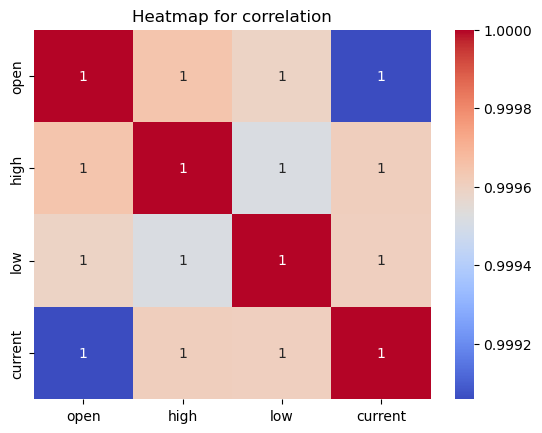

In [47]:
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Heatmap for correlation")
plt.show;

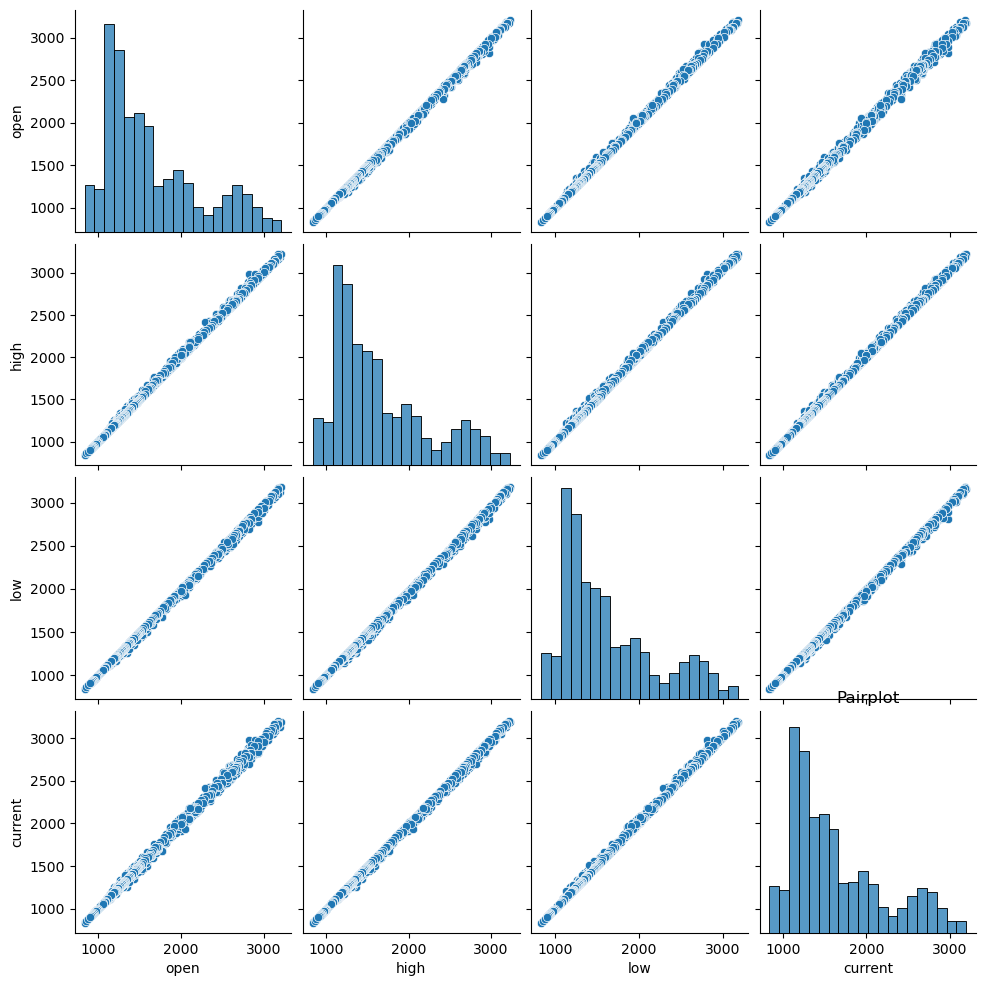

In [48]:
sns.pairplot(data=nepse_df)
plt.title("Pairplot")
plt.show;

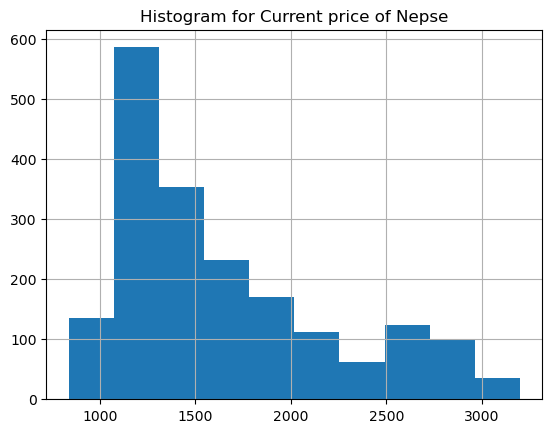

In [49]:
nepse_df["current"].hist()
plt.title("Histogram for Current price of Nepse")
plt.show;

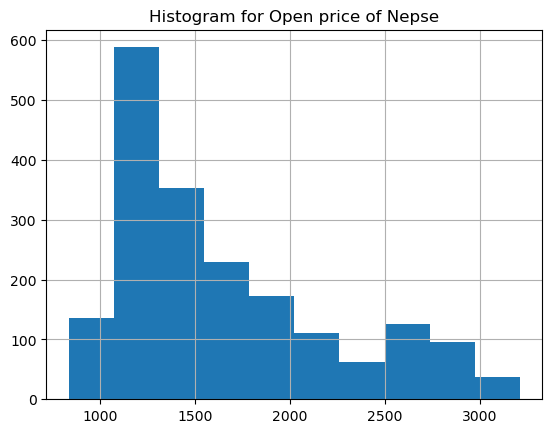

In [50]:
nepse_df["open"].hist()
plt.title("Histogram for Open price of Nepse")
plt.show;

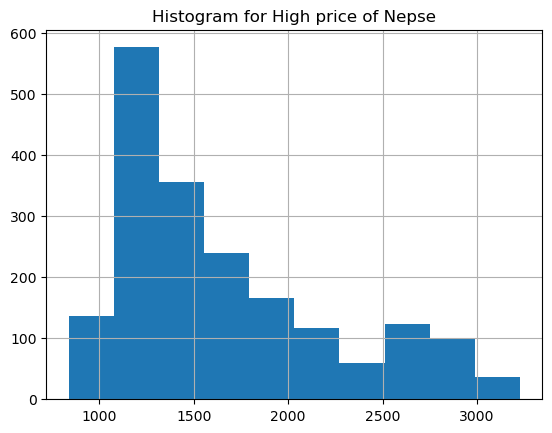

In [51]:
nepse_df["high"].hist()
plt.title("Histogram for High price of Nepse")
plt.show;

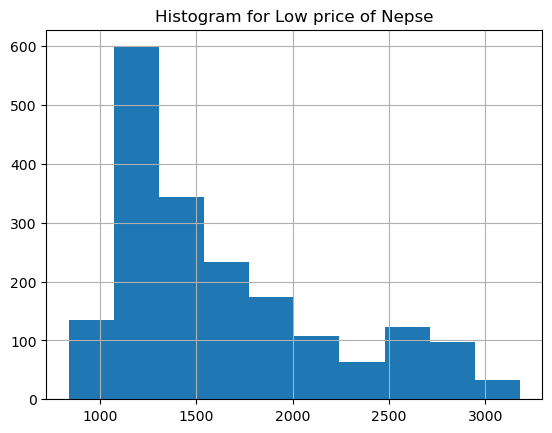

In [52]:
nepse_df["low"].hist()
plt.title("Histogram for Low price of Nepse")
plt.show;

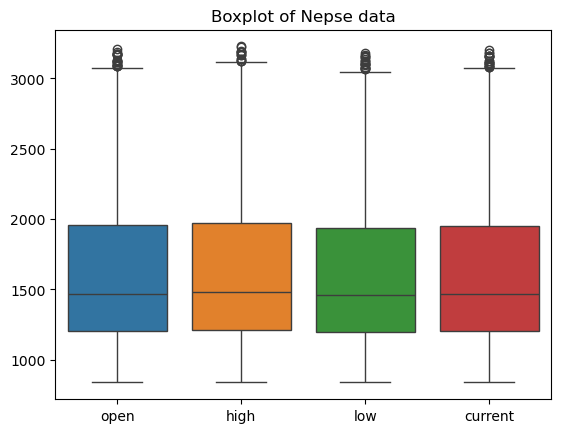

In [53]:
sns.boxplot(nepse_df)
plt.title("Boxplot of Nepse data")
plt.show;

In [54]:
!pip install plotly

In [55]:
import plotly.graph_objects as go

figure = go.Figure(data= [go.Candlestick(x =nepse_df["published_date"], 
                                  open = nepse_df["open"], close = nepse_df["current"],
                                  low = nepse_df["low"], high= nepse_df["high"])])
figure.update_layout(title= "Nepse Stock Price Analysis", xaxis_rangeslider_visible =False)
figure.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [57]:
X = nepse_df[["open", "high", "low"]]
y = nepse_df["current"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [59]:
y_pred = linear_model.predict(X_test)

In [60]:
new_df = pd.DataFrame({"Actual Price": y_test,"Predicted": y_pred})
new_df

,Actual Price,Predicted
1424,1278.98,1247.307099
111,1876.41,1879.582309
1850,940.00,939.167965
968,1172.98,1171.705929
415,2875.49,2868.825967
...,...,...
1221,1423.83,1420.965604
1837,945.00,944.169404
733,1172.64,1171.502679
584,1562.46,1574.302771


In [61]:
mse  = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
regression_confidence= linear_model.score(X_test, y_test)

print("mean_squared_error: ",mse)
print("root_mean_squared_error: ",rmse)
print("regression confidence: ",regression_confidence)

mean_squared_error:  90.16733334035224
root_mean_squared_error:  9.495648126397283
regression confidence:  0.9997138019464582


In [62]:
x2 = abs(y_pred - y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)

print("accuracy:",accuracy.round(2),"%")

accuracy: 99.69 %


In [63]:
import joblib

joblib.dump(linear_model, "nepse_prediction_model.pkl")

['nepse_prediction_model.pkl']